# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np

In [3]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

Totals

In [5]:
df.groupby("prestige").count()

,admit,gre,gpa
prestige,,,
1.0,61,61,61
2.0,148,148,148
3.0,121,121,121
4.0,67,67,67


In [6]:
df.prestige.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

#### Frequency Table

In [8]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(index = df.admit, columns = df.prestige)

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


Two way Frequency Table

In [9]:
# better 
admit_prestige = pd.crosstab(index = df.admit, columns = df.prestige, margins = True)

admit_prestige.index = ["rejected", "accepted", "Total"]

admit_prestige

prestige,1.0,2.0,3.0,4.0,All
rejected,28,95,93,55,271
accepted,33,53,28,12,126
Total,61,148,121,67,397


Two way Frequency Table Ratio

In [11]:
admit_prestige/admit_prestige.ix["Total", "All"]

prestige,1.0,2.0,3.0,4.0,All
rejected,0.070529,0.239295,0.234257,0.138539,0.68262
accepted,0.083123,0.133501,0.070529,0.030227,0.31738
Total,0.153652,0.372796,0.304786,0.168766,1.00000


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html<br/>
https://www.youtube.com/watch?v=0s_1IsROgDc


In [12]:
prestige_dummy = pd.get_dummies(df.prestige)
prestige_dummy.head(10)

,1.0,2.0,3.0,4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0


In [13]:

prestige_dummy = pd.get_dummies(df.prestige, prefix = "prestige")
prestige_dummy.head(10)

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0


In [14]:
df2 = pd.get_dummies(df, columns= ["prestige"], drop_first= True)
df2.head(10)

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0
5,1,760.0,3.00,1.0,0.0,0.0
6,1,560.0,2.98,0.0,0.0,0.0
7,0,400.0,3.08,1.0,0.0,0.0
8,1,540.0,3.39,0.0,1.0,0.0
9,0,700.0,3.92,1.0,0.0,0.0


#### 2.2 When modeling our class variables, how many do we need? 

Answer: _n_ - 1 so 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [15]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(prestige_dummy.ix[:, 'prestige_1.0':])
handCalc.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0


In [16]:
admit_prestige = pd.crosstab(index = df.admit, columns = df.prestige, margins = True)

admit_prestige.index = ["rejected", "accepted", "Total"]

admit_prestige

prestige,1.0,2.0,3.0,4.0,All
rejected,28,95,93,55,271
accepted,33,53,28,12,126
Total,61,148,121,67,397


In [17]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
admit_prestige1 = pd.crosstab(index = handCalc.admit, columns = handCalc["prestige_1.0"], margins = True)

admit_prestige1.index = ["rejected", "accepted", "Total"]
admit_prestige1.columns = ["not1", "one", "All"]

admit_prestige1

,not1,one,All
rejected,243,28,271
accepted,93,33,126
Total,336,61,397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

http://localhost:8888/notebooks/DataSciCourse/lessons/lesson-05/code/starter-code/starter-code-5.ipynb

Probability


In [18]:
print "number admitted with prestige of 1: {}".format(admit_prestige1[admit_prestige1.index == "accepted"].one)
print "Total with prestige of 1: {}".format(admit_prestige1[admit_prestige1.index == "Total"].one)

number admitted with prestige of 1: accepted    33
Name: one, dtype: int64
Total with prestige of 1: Total    61
Name: one, dtype: int64


In [19]:
(admit_prestige1[admit_prestige1.index == "accepted"].one)/float(admit_prestige1[admit_prestige1.index == "Total"].one)

accepted    0.540984
Name: one, dtype: float64

In [20]:
print "If you attended a #1 ranked college you have a {}% chance of being accepted".format(
    (admit_prestige1[admit_prestige1.index == "accepted"].one)/float(admit_prestige1[admit_prestige1.index == "Total"].one)*100)

If you attended a #1 ranked college you have a accepted    54.098361
Name: one, dtype: float64% chance of being accepted


#### Odds of admission prestige = 1

In [23]:
Odds1 = (admit_prestige1[admit_prestige1.index == "accepted"].one)/float(admit_prestige1[admit_prestige1.index == "rejected"].one)
Odds1

accepted    1.178571
Name: one, dtype: float64

1.18 : 1


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [24]:
print "number admitted with prestige of 1: {}".format(admit_prestige1[admit_prestige1.index == "accepted"].not1)
print "Total with prestige of 1: {}".format(admit_prestige1[admit_prestige1.index == "Total"].not1)

number admitted with prestige of 1: accepted    93
Name: not1, dtype: int64
Total with prestige of 1: Total    336
Name: not1, dtype: int64


In [27]:
OddsNot1 = (admit_prestige1[admit_prestige1.index == "accepted"].not1)/float(admit_prestige1[admit_prestige1.index == "rejected"].not1)
OddsNot1

accepted    0.382716
Name: not1, dtype: float64

#### Odds of admission prestige != 1

In [21]:
OddsNot1 = (admit_prestige1[admit_prestige1.index == "accepted"].not1)/float(admit_prestige1[admit_prestige1.index == "rejected"].not1)
OddsNot1

accepted    0.382716
Name: not1, dtype: float64

.38 : 1


#### 3.3 Calculate the odds ratio

In [28]:
OR = float(Odds1) / OddsNot1
OR

accepted    3.079493
Name: not1, dtype: float64

#### 3.4 Write this finding in a sentenance: 

Answer: <br/>
3 times more likely to be admitted to the univeristy with the highest prestige (ranked 1) than any lower ranked prestige

#### 3.5 Print the cross tab for prestige_4

In [29]:

admit_prestige4 = pd.crosstab(index = handCalc.admit, columns = handCalc["prestige_4.0"], margins = True)

admit_prestige4.index = ["rejected", "accepted", "Total"]
admit_prestige4.columns = ["not4", "four", "All"]

admit_prestige4

,not4,four,All
rejected,216,55,271
accepted,114,12,126
Total,330,67,397


#### 3.6 Calculate the OR 

In [31]:
Odds4 = admit_prestige4[admit_prestige4.index == "accepted"].four/float(
    admit_prestige4[admit_prestige4.index == "rejected"].four)

print Odds4

OddsNot4 = admit_prestige4[admit_prestige4.index == "accepted"].not4/float(
    admit_prestige4[admit_prestige4.index == "rejected"].not4)

print OddsNot4

print "Odds Ratio for lowest prestige college {} to 1".format(Odds4/OddsNot4)

accepted    0.218182
Name: four, dtype: float64
accepted    0.527778
Name: not4, dtype: float64
Odds Ratio for lowest prestige college accepted    0.413397
dtype: float64 to 1


#### 3.7 Write this finding in a sentence

Answer: <br/>
Students that graduated from the lowest prestige (ranked 4) college were 60% less likely to be admitted into UCLA hypothetically

## Part 4. Analysis

In [32]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummy.ix[:, 'prestige_2.0':])
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0


In [33]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [34]:
df2 = pd.read_csv("../assets/admissions.csv")
df2.head(3)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0


In [35]:
dfDum = df2.join(pd.get_dummies(df2['prestige'], prefix = 'prestige'))
dfDum.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [36]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0.0,1.0,0.0,1.0
1,1,660.0,3.67,0.0,1.0,0.0,1.0
2,1,800.0,4.00,0.0,0.0,0.0,1.0
3,1,640.0,3.19,0.0,0.0,1.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0,1.0


#### 4.1 Set the covariates to a variable called train_cols

k-folds cross validation <br/>
before making fitting the model <br/>
sklearn http://scikit-learn.org/stable/modules/cross_validation.html <br/>
sklearn http://localhost:8888/notebooks/DataSciCourse/lessons/lesson-07/code/starter-code/starter-code-7.ipynb <br/>
statsmodels no link

In [37]:
from sklearn.cross_validation import KFold
# doesn't work idk

In [38]:
# k-folds
X = data
y = data.admit

# X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
# kf = KFold(n_splits=2)
# kf.get_n_splits(X)

kf = KFold(4, n_folds=2)


# for train, test in kf.get_n_splits(X):
#     print("%s %s" % (train, test))

http://localhost:8888/notebooks/DataSciCourse/lessons/lesson-09/code/starter-code/starter-code-9_from_class.ipynb

In [40]:
train_cols = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

#### 4.2 Fit the model

In [41]:
# stats models Logit function
logistic = sm.Logit(data['admit'], data[train_cols])
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


#### 4.3 Print the summary results

In [42]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Mon, 09 Jan 2017   Pseudo R-squ.:                 0.05722
Time:                        14:55:40   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2.0    -0.9562      0.302     -3.17

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Mon, 09 Jan 2017   Pseudo R-squ.:                 0.05722
Time:                        14:55:57   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2.0    -0.9562      0.302     -3.171      0.002        -1.547    -0.365
prestige_3.0    -1.5375      0.332     -4.627      0.000        -2.189    -0.886
prestige_4.0    -1.8699      0.401     -4.658      0.000        -2.657    -1.083
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [44]:
# first the exponential of each of the coefficients
expCoeff = np.exp(result.params)
expCoeff

gre             1.001368
gpa             0.876073
prestige_2.0    0.384342
prestige_3.0    0.214918
prestige_4.0    0.154135
dtype: float64

In [45]:
confInt = result.conf_int()
confInt
# confidence interval

,0,1
gre,-0.000680,0.003414
gpa,-0.513657,0.249045
prestige_2.0,-1.547279,-0.365166
prestige_3.0,-2.188769,-0.886230
prestige_4.0,-2.656743,-1.083112


In [46]:
confInt['OR'] = result.params
confInt

,0,1,OR
gre,-0.000680,0.003414,0.001367
gpa,-0.513657,0.249045,-0.132306
prestige_2.0,-1.547279,-0.365166,-0.956223
prestige_3.0,-2.188769,-0.886230,-1.537500
prestige_4.0,-2.656743,-1.083112,-1.869928


In [47]:
params = result.params
confInt = result.conf_int()
confInt['OR'] = params
confInt.columns = ['2.5', '97.5', 'OR']
np.exp(confInt)

,2.5,97.5,OR
gre,0.999320,1.003420,1.001368
gpa,0.598303,1.282800,0.876073
prestige_2.0,0.212826,0.694082,0.384342
prestige_3.0,0.112055,0.412207,0.214918
prestige_4.0,0.070176,0.338540,0.154135


#### 4.5 Interpret the OR of Prestige_2

Answer: There is very close to a 50/50 Odds Ratio for success at Prestige = 2

#### 4.6 Interpret the OR of GPA

Answer: For each unit change in GPA there is a 2x increase in Odds for success of admittance.

## Part 5: Predicted probablities

As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [48]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [49]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
# use natural breaks instead??

gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print 'GRES: {}'.format(gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print 'GPAS: {}'.format(gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

GRES: [ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
GPAS: [ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [50]:
combos.head()

,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [51]:
combos.groupby(0).count()

,1,2,3
0,,,
220.000000,40,40,40
284.444444,40,40,40
348.888889,40,40,40
413.333333,40,40,40
477.777778,40,40,40
542.222222,40,40,40
606.666667,40,40,40
671.111111,40,40,40
735.555556,40,40,40


In [52]:
combos.groupby(1).count()

,0,2,3
1,,,
2.260000,40,40,40
2.453333,40,40,40
2.646667,40,40,40
2.840000,40,40,40
3.033333,40,40,40
3.226667,40,40,40
3.420000,40,40,40
3.613333,40,40,40
3.806667,40,40,40


#### 5.1 Recreate the dummy variables

In [53]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0


#### 5.2 Make predictions on the enumerated dataset

In [54]:
# result.predict - how does it know - predicting from the logistic.fit in part 4 
combos['prediction'] = result.predict(combos[train_cols])
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,prediction
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0,0.500412
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0,0.277966
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0,0.177139
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0,0.133741
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0,0.494018


#### 5.3 Interpret findings for the last 4 observations

In [55]:
combos.tail(4)

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,prediction
396,800.0,4.0,1.0,1.0,0.0,0.0,0.0,0.637399
397,800.0,4.0,2.0,1.0,1.0,0.0,0.0,0.403204
398,800.0,4.0,3.0,1.0,0.0,1.0,0.0,0.274202
399,800.0,4.0,4.0,1.0,0.0,0.0,1.0,0.213184


Answer: <br/>
GRE and GPA being equal one can observe the predicted outcome for admittance vary quite drastically in respect to prestige ranking. Prestige of 1 which is the intercept has the highest probability of admittance. Even with perfect GRE and perfect GPA with a prestige of 4 the predicted probability is only 37%...21%

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

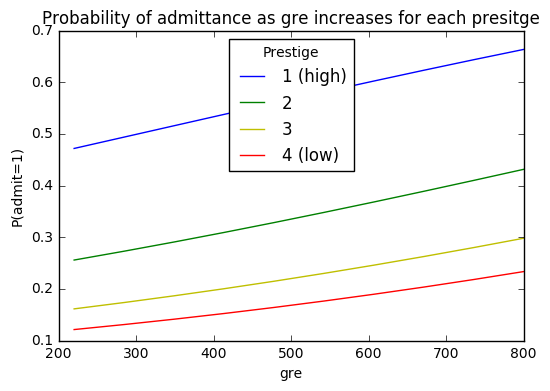

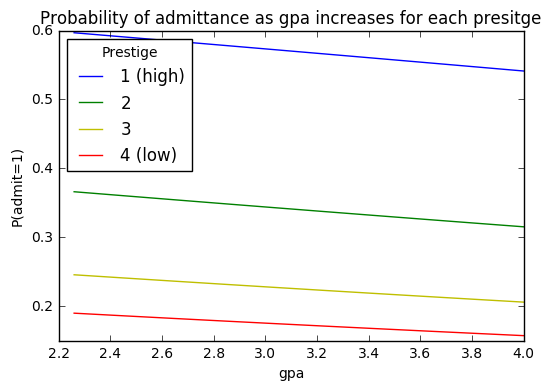

In [56]:
def probPlot(variable):
      # isolate gre and class rank
    group = pd.pivot_table(combos, values=['prediction'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      # make a plot
    colors = 'rbgyrgby'
    for column in combos.prestige.unique():
        plotData = group.ix[group.index.get_level_values(1)==column]
        pl.plot(plotData.index.get_level_values(0), plotData['prediction'], color=colors[int(column)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1 (high)', '2', '3', '4 (low)'], loc='best', title='Prestige')
    pl.title("Probability of admittance as " + variable + " " + "increases for each presitge")
    pl.show()

probPlot('gre')
probPlot('gpa')